In [1]:
# Notebook for processing raw data 
# Selects only triggers and releases
# Load data
import numpy as np
import matplotlib.pyplot as plt
from peratouch.config import data_dir
from peratouch.preprocessing import TriggersAndReleases
# Width of triggers 
width = 32 
path = data_dir / "raw_npz" / "five_users_main_collection.npz"
data = np.load((path))


USER U0
Signal shape: (9380602,)
Excluded noisy triggers: (742, 32)
Excluded short triggers: (3343, 32)
Included clean triggers: (25365, 32)
Included clean releases: (25365, 32)

USER U1
Signal shape: (9380602,)
Excluded noisy triggers: (1256, 32)
Excluded short triggers: (2339, 32)
Included clean triggers: (20540, 32)
Included clean releases: (20540, 32)

USER U2
Signal shape: (9380602,)
Excluded noisy triggers: (1042, 32)
Excluded short triggers: (1065, 32)
Included clean triggers: (24058, 32)
Included clean releases: (24058, 32)

USER U3
Signal shape: (9380602,)
Excluded noisy triggers: (1092, 32)
Excluded short triggers: (794, 32)
Included clean triggers: (24400, 32)
Included clean releases: (24400, 32)

USER U4
Signal shape: (9380602,)
Excluded noisy triggers: (1149, 32)
Excluded short triggers: (2318, 32)
Included clean triggers: (19693, 32)
Included clean releases: (19693, 32)


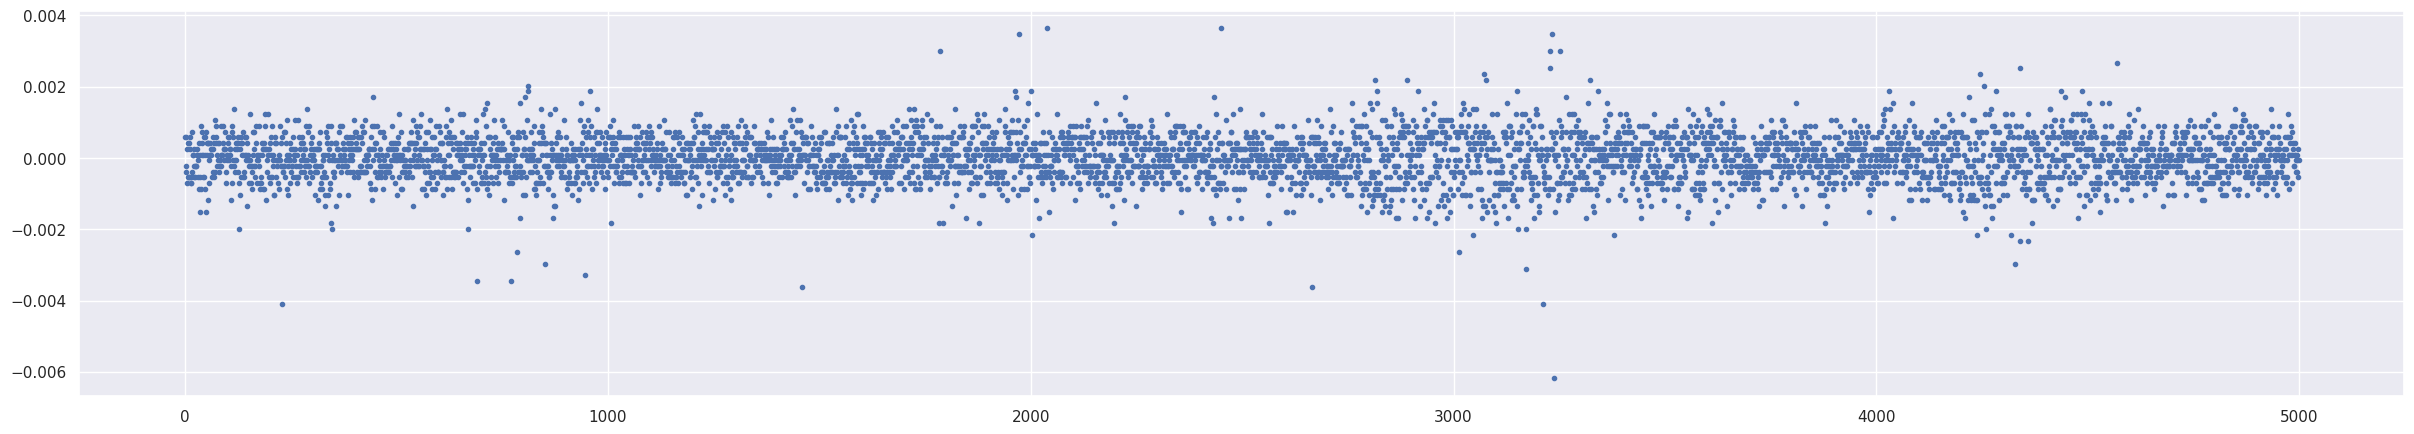

In [2]:
# Look at a few triggers of one of the users
key = list(data.keys())[0] 
TR = TriggersAndReleases(data)
TR.plot_signal(key)
TR.run()

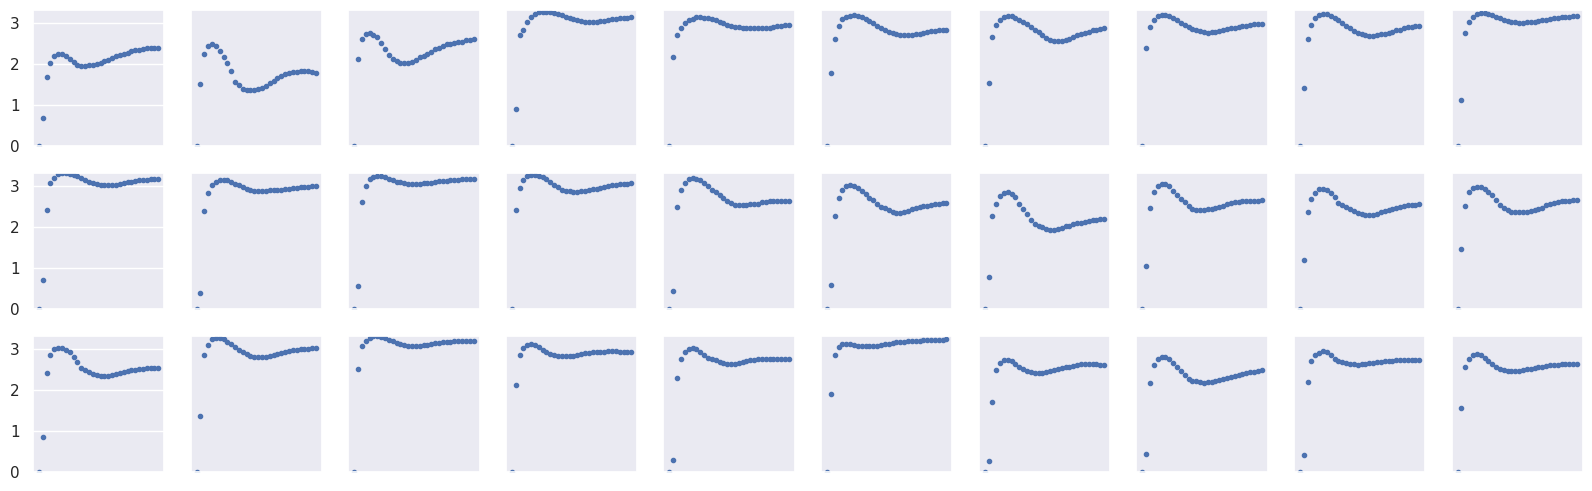

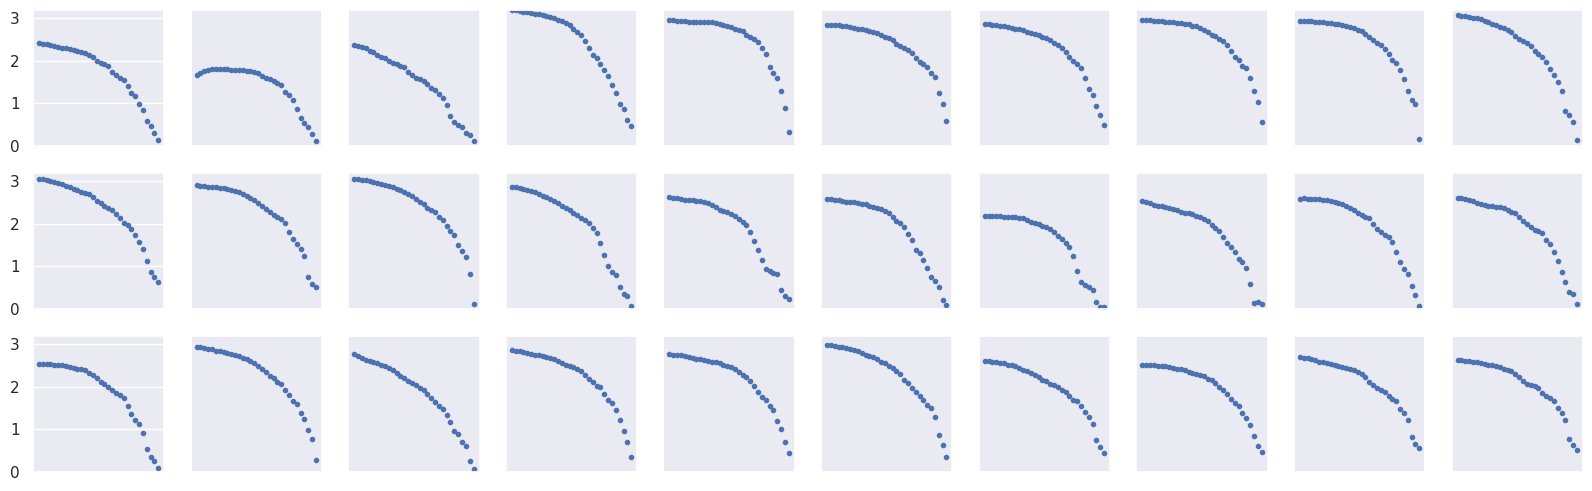

In [3]:
TR.plot_clean(key)

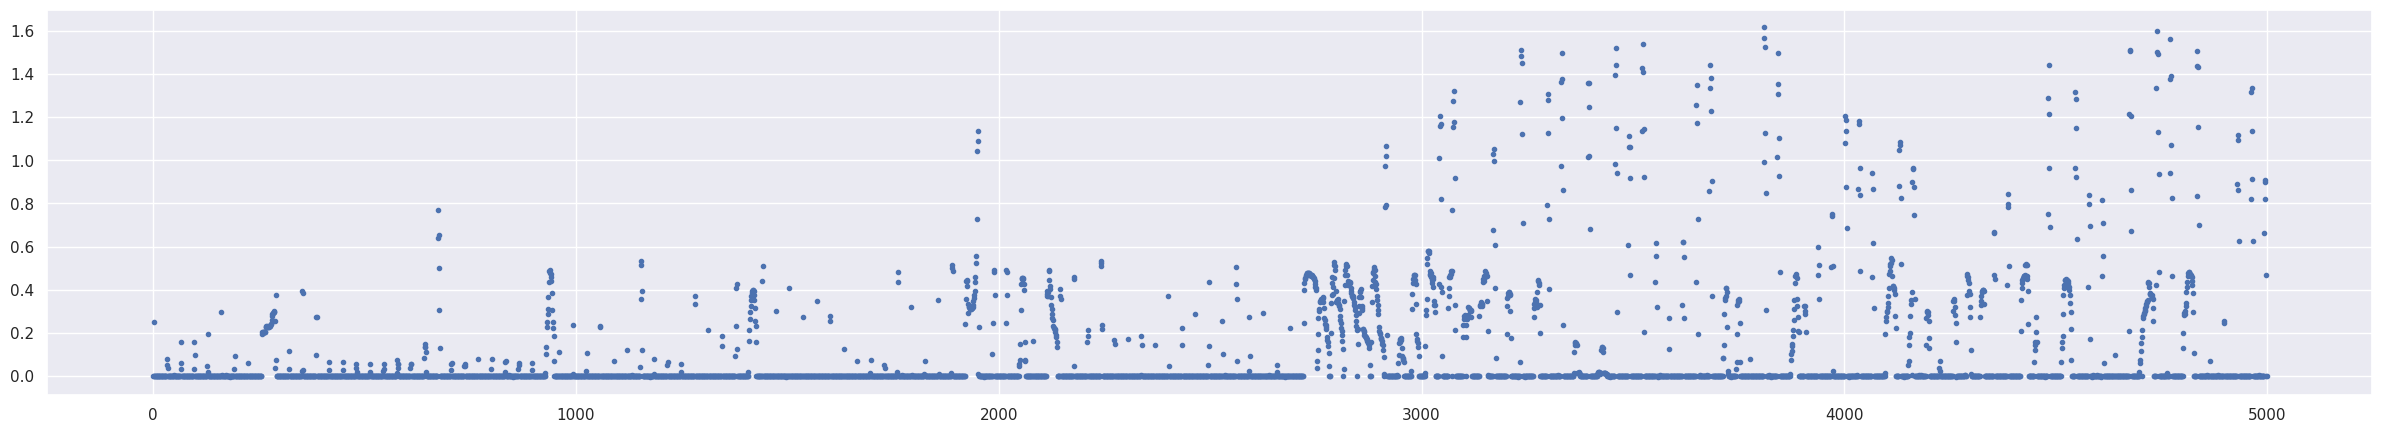

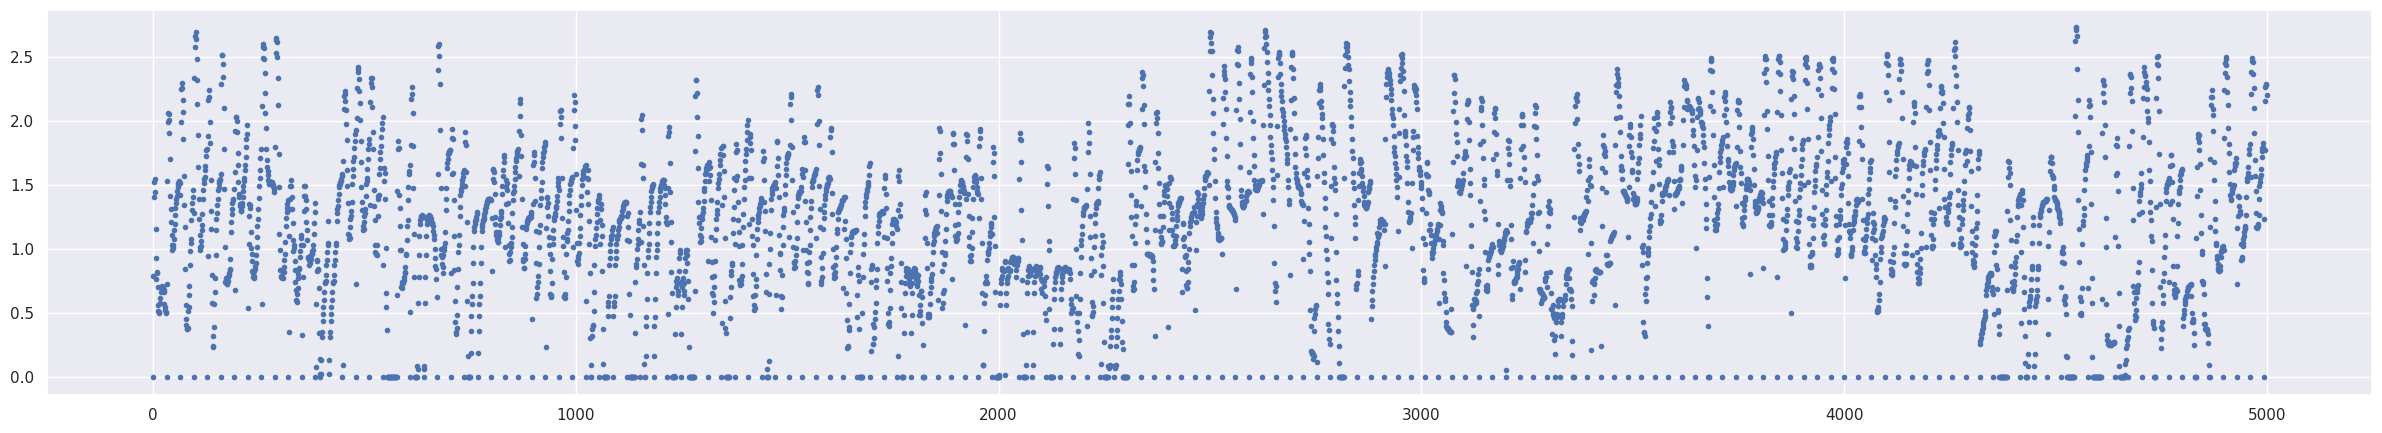

In [4]:
TR.plot_discarded(key)

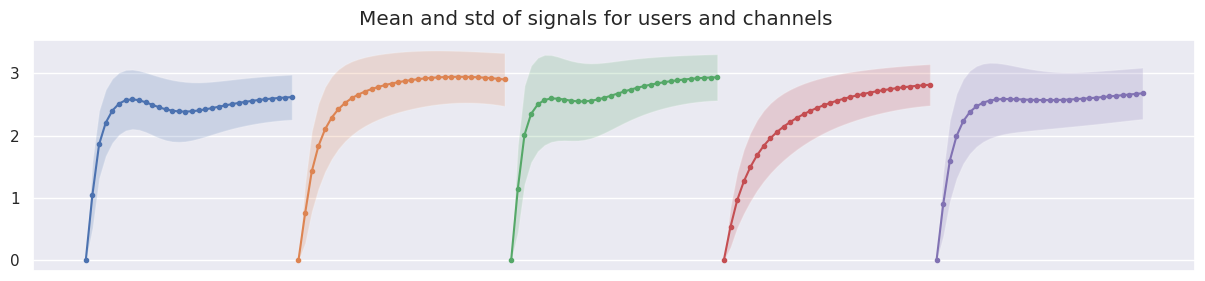

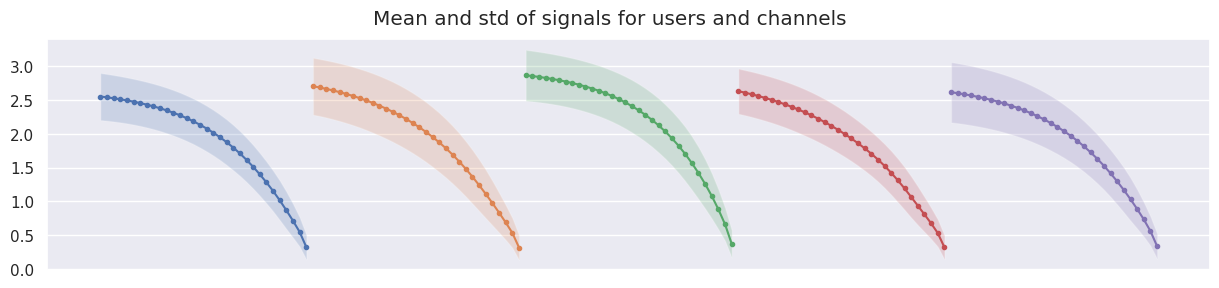

In [5]:
# Compare the mean and std of the signals for all the users involved
TR.plot_means_std()

In [6]:
# Save file
filename = path.name.split(".")[0] + "_window" + f"_{TR.get_triggers()[key].shape[1]}.npz"
save_path = data_dir / "processed" / filename
TR.save_dict(save_path)




Saved U0_triggers : (25365, 32)
Saved U0_releases : (25365, 32)
Saved U1_triggers : (20540, 32)
Saved U1_releases : (20540, 32)
Saved U2_triggers : (24058, 32)
Saved U2_releases : (24058, 32)
Saved U3_triggers : (24400, 32)
Saved U3_releases : (24400, 32)
Saved U4_triggers : (19693, 32)
Saved U4_releases : (19693, 32)

Saved file in /home/guijmp/dev/Masters_Project/data/processed/five_users_main_collection_window_32.npz
